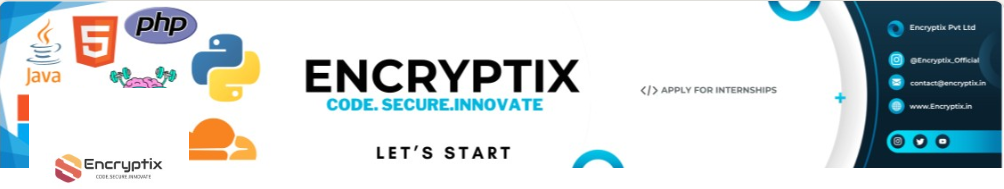

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

In [2]:
train = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
train.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
train.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [6]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train, test_size=0.2, random_state=42)

In [8]:
numeric_features = train.select_dtypes(include=[np.number]).columns
categorical_features = train.select_dtypes(include='object').columns

In [9]:
categorical_features

Index(['Geography', 'Gender'], dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(train[categorical_features])
encoded_cols = list(encoder.get_feature_names_out(categorical_features))
train[encoded_cols] = encoder.transform(train[categorical_features]).toarray()

In [11]:
encoder1 = OneHotEncoder().fit(test[categorical_features])
encoded_cols = list(encoder1.get_feature_names_out(categorical_features))
test[encoded_cols] = encoder1.transform(test[categorical_features]).toarray()

In [12]:
train.drop(categorical_features, axis=1, inplace=True)

In [13]:
test.drop(categorical_features, axis=1, inplace=True)

In [14]:
numeric_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
target = train['Exited']
target_test = test['Exited']

In [16]:
numeric_features = numeric_features.drop('Exited')

In [17]:
from sklearn.preprocessing import StandardScaler
train[numeric_features] = StandardScaler().fit_transform(train[numeric_features])
test[numeric_features] = StandardScaler().fit_transform(test[numeric_features])

In [18]:
train[encoded_cols] = StandardScaler().fit_transform(train[encoded_cols])
test[encoded_cols] = StandardScaler().fit_transform(test[encoded_cols])

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
train_model1 = RandomForestClassifier().fit(train[encoded_cols + list(numeric_features)], target)
predictions = train_model1.predict(train[encoded_cols + list(numeric_features)])

In [20]:
print('ROC_AUC_SCORE: ',roc_auc_score(target, predictions))
print(classification_report(target, predictions))
print(confusion_matrix(target, predictions))

ROC_AUC_SCORE:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

[[6356    0]
 [   0 1644]]


In [21]:
predictions_test = train_model1.predict(test[encoded_cols + list(numeric_features)])
print(roc_auc_score(target_test, predictions_test))
print(classification_report(target_test, predictions_test))
print(confusion_matrix(target_test, predictions_test))

0.7176617565327266
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1546   61]
 [ 207  186]]
